/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48180 (\N{HANGUL SYLLABLE BAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

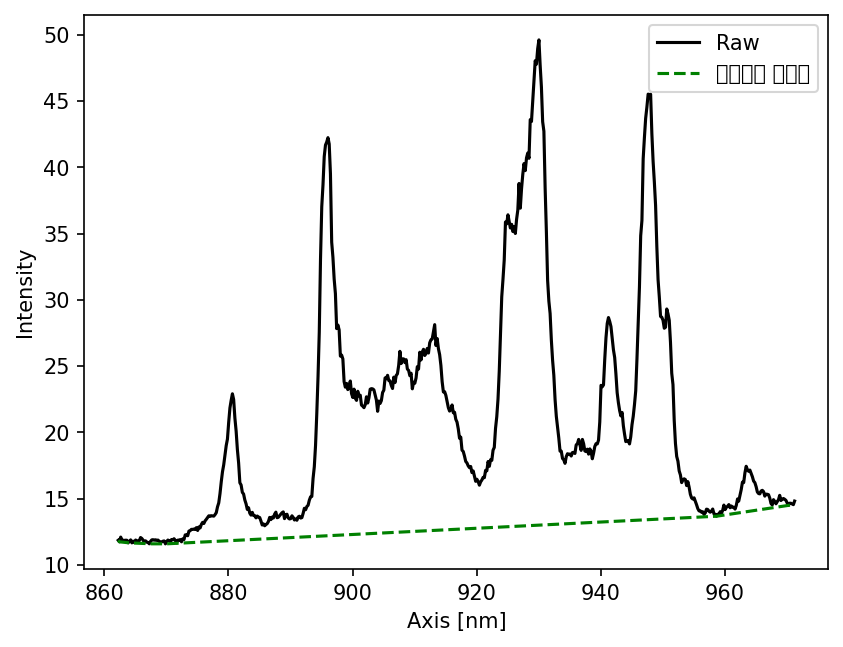

In [ ]:
### min-max

import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt

# 데이터 로드
df = pd.read_csv('UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = ['ROI 1 []', 'ROI 2 []', 'ROI 3 []', 'ROI 4 []', 'ROI 5 []', 'ROI 6 []', 'ROI 7 []', 'ROI 8 []', 'ROI 9 []', 'ROI 10 []', 'ROI 11 []', 'ROI 12 []', 'ROI 13 []']
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values  # pandas Series에서 numpy 배열로 변환

# 기준선 추정을 위한 구간 설정
roi = np.array([[min(x), max(x)]])

# 기준선 추정
ycalc_rubberband, base_rubberband = rampy.baseline(x, y, roi, 'rubberband')

# 그래프 그리기
fig, ax = plt.subplots(dpi=150)
line_raw, = plt.plot(x, y, "k-", label="Raw")
line_rubberband, = plt.plot(x, base_rubberband, "--", color="green", label="러버밴드 기준선")

# 그래프 클릭 시 기준선 그리기
points = []

def on_click(event):
    if event.button == 1:  # 좌클릭
        points.append((event.xdata, event.ydata))
        if len(points) == 2:
            x1, y1 = points[0]
            x2, y2 = points[1]
            slope = (y2 - y1) / (x2 - x1)
            baseline_line = y - slope * (x - x1)
            line_baseline, = ax.plot(x, baseline_line, "r--", label="선택한 기준선")
            plt.legend()  # 범례 업데이트
            plt.draw()  # 그래프 업데이트
            points.clear()

cid = fig.canvas.mpl_connect('button_press_event', on_click)

# line_rubberband을 baseline으로 설정
y = base_rubberband

plt.xlabel("Axis [nm]")
plt.ylabel("Intensity")

plt.legend()
plt.show()

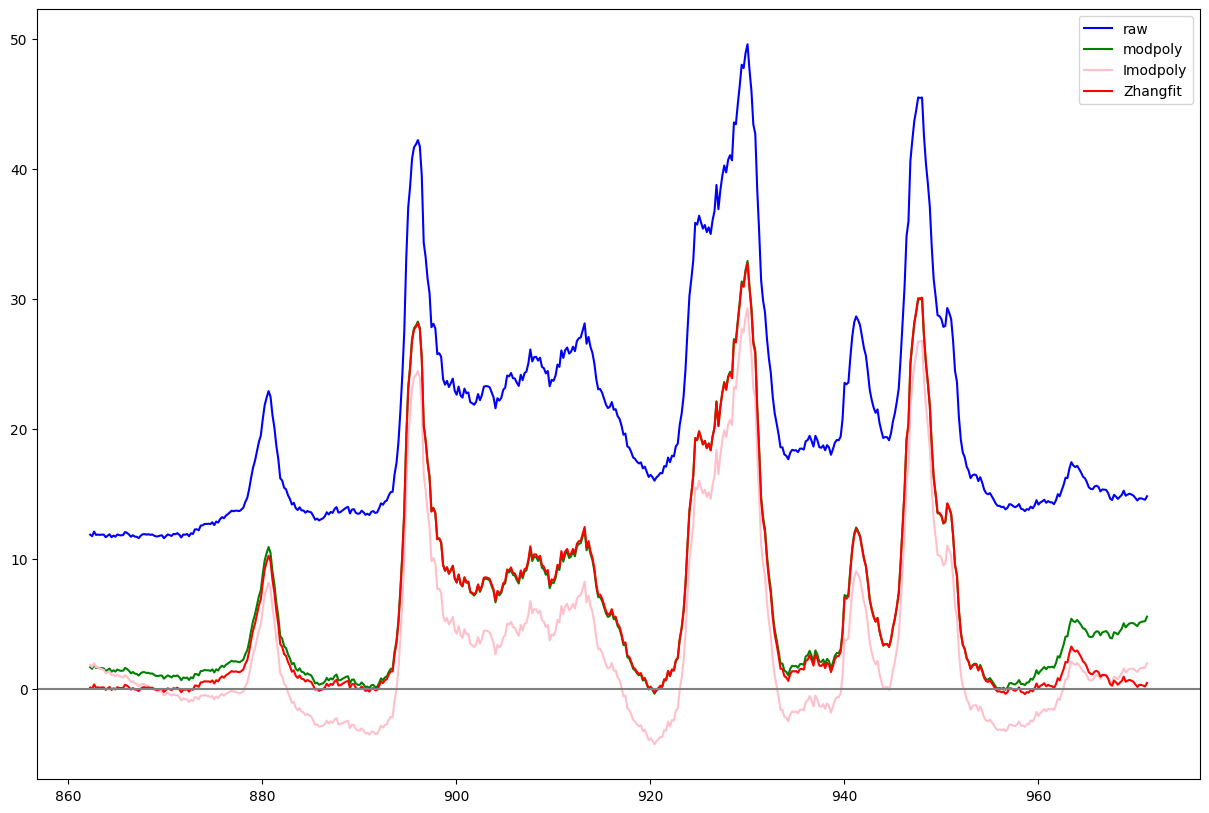

In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = ['ROI 1 []', 'ROI 2 []', 'ROI 3 []', 'ROI 4 []', 'ROI 5 []', 'ROI 6 []', 'ROI 7 []', 'ROI 8 []', 'ROI 9 []', 'ROI 10 []', 'ROI 11 []', 'ROI 12 []', 'ROI 13 []']
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values  # pandas Series에서 numpy 배열로 변환

# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

#print('Raw Data:',y)
#print('Modpoly base corrected values:',Modpoly_output)
#print('IModPoly base corrected values:',Imodpoly_output)
#print('ZhangFit base corrected values:',Zhangfit_output)

# 그래프 그리기
plt.figure(figsize=(15,10))
plt.plot(x, y, label='raw', color='blue')
plt.plot(x, Modpoly_output, label='modpoly', color='green')
plt.plot(x, Imodpoly_output, label='Imodpoly', color='pink')
plt.plot(x, Zhangfit_output, label='Zhangfit', color='red')
plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

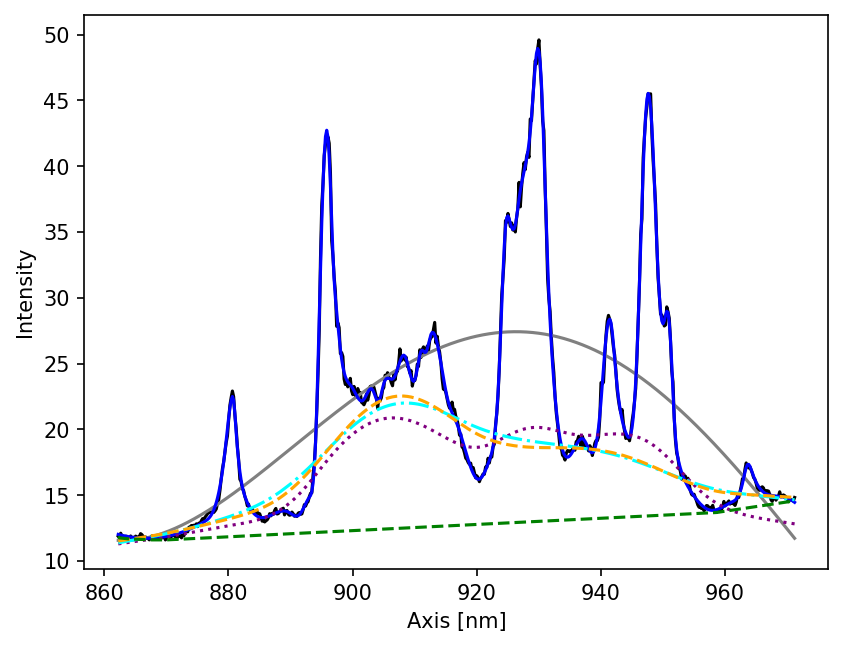

In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 기준선 추정을 위한 구간 설정
roi = np.array([[min(x), max(x)]])

# 기준선 추정
ycalc_poly, base_poly = rampy.baseline(x, y, roi, 'poly', polynomial_order=4)
ycalc_uni, base_uni = rampy.baseline(x, y, roi, 'unispline', s=1e0)
ycalc_als, base_als = rampy.baseline(x, y, roi, 'als', lam=10**5, p=0.05)
ycalc_arpls, base_arpls = rampy.baseline(x, y, roi, 'arPLS', lam=10**6, ratio=0.001)
ycalc_drpls, base_drpls = rampy.baseline(x, y, roi, 'drPLS')
ycalc_rubberband, base_rubberband = rampy.baseline(x, y, roi, 'rubberband')

# 그래프 그리기
fig, ax = plt.subplots(dpi=150)
plt.plot(x, y, "k-", label="Raw")
plt.plot(x, base_poly, "-", color="grey", label="다항식 기준선")
plt.plot(x, base_uni, "b-", label="유니스플라인 기준선")
plt.plot(x, base_als, ":", color="purple", label="ALS 기준선")
plt.plot(x, base_arpls, "-.", color="cyan", label="arPLS 기준선")
plt.plot(x, base_drpls, "--", color="orange", label="drPLS 기준선")
plt.plot(x, base_rubberband, "--", color="green", label="러버밴드 기준선")

# 기준선 선택을 위한 변수 초기화
points = []
line = None

def on_pick(event):
    global line
    if len(points) < 2:
        points.append((event.mouseevent.xdata, event.mouseevent.ydata))
        if len(points) == 2:
            x1, y1 = points[0]
            x2, y2 = points[1]
            slope = (y2 - y1) / (x2 - x1)
            baseline_line = y - slope * (x - x1)
            line, = ax.plot(x, baseline_line, "r--", label="선택한 기준선")
            plt.legend()
            plt.draw()

# 이벤트 처리기 등록
fig.canvas.mpl_connect('pick_event', on_pick)

plt.xlabel("Axis [nm]")
plt.ylabel("Intensity")

plt.show()


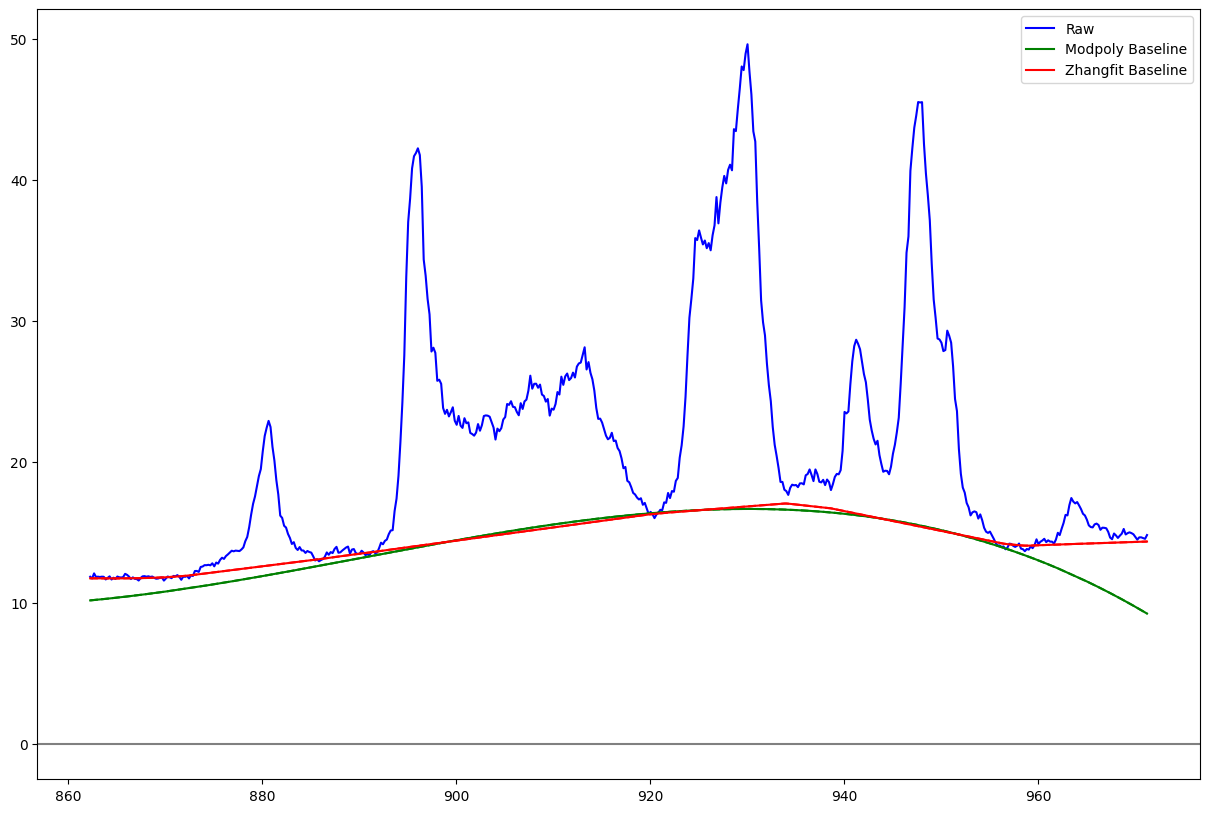

In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values
# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15,10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Modpoly 기준선과 그래프
baseline_modpoly = y - Modpoly_output
plt.plot(x, baseline_modpoly, label='Modpoly Baseline', color='green')
plt.plot(x, baseline_modpoly, '--', color='green')

# IModpoly 기준선과 그래프
#baseline_imodpoly = y - Imodpoly_output
#plt.plot(x, baseline_imodpoly, label='IModpoly Baseline', color='pink')
#plt.plot(x, baseline_imodpoly, '--', color='pink')

# Zhangfit 기준선과 그래프
baseline_zhangfit = y - Zhangfit_output
plt.plot(x, baseline_zhangfit, label='Zhangfit Baseline', color='red')
plt.plot(x, baseline_zhangfit, '--', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()




#1. Modpoly (Modified Polynomial) 알고리즘:
#   - 주어진 스펙트럼에 대해 다항식으로 기준선 추정
#   - 다항식 차수를 입력으로 받아서 다항식 조정
#   - 다항식을 사용하여 추정된 기준선을 스펙트럼에서 제거하여 보정된 결과
#
#
#2. Zhangfit 알고리즘:
#   - 회귀 알고리즘을 사용하여 기준선을 추정합니다.
#   - 스펙트럼에서 추정된 기준선을 제거하여 보정된 결과를 얻습니다.


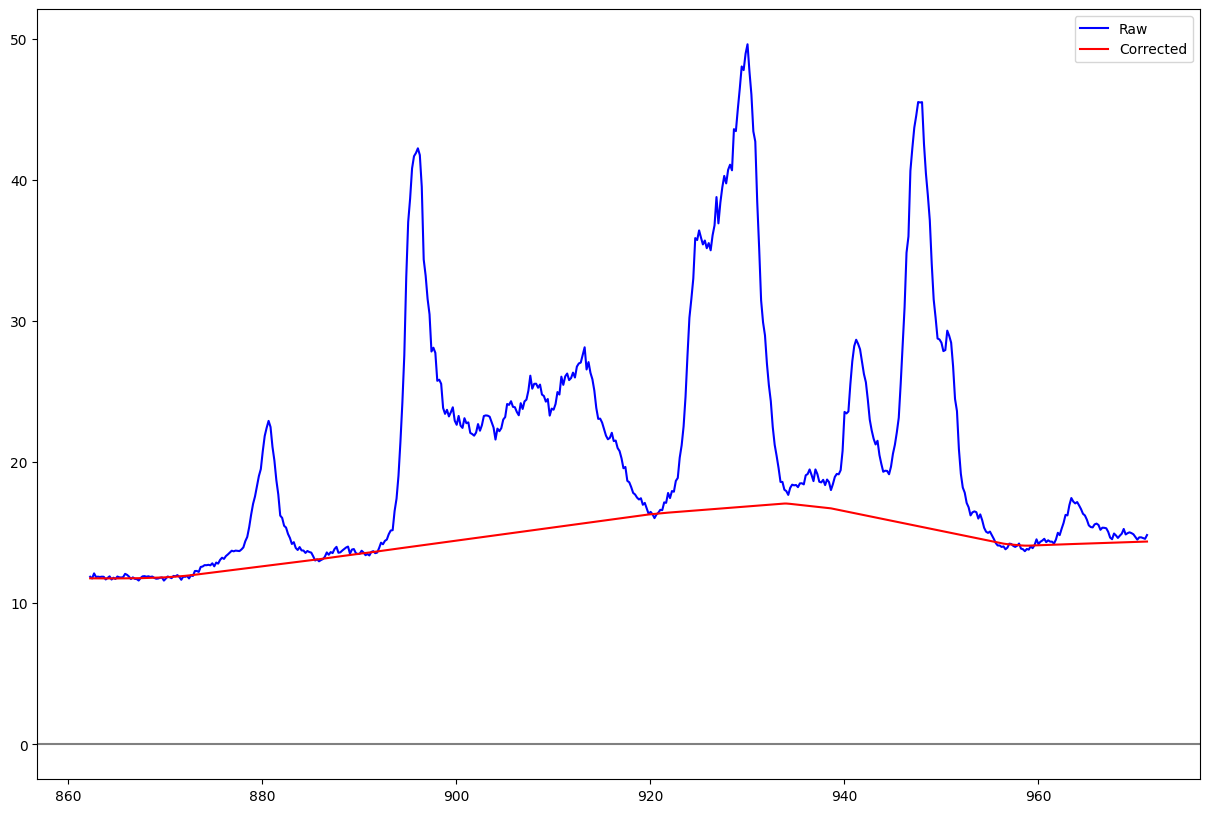

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15,10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Zhangfit 기준선과 보정된 그래프
baseline_zhangfit = Zhangfit_output
corrected_data = y - baseline_zhangfit
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


In [ ]:
!pip install BaselineRemoval

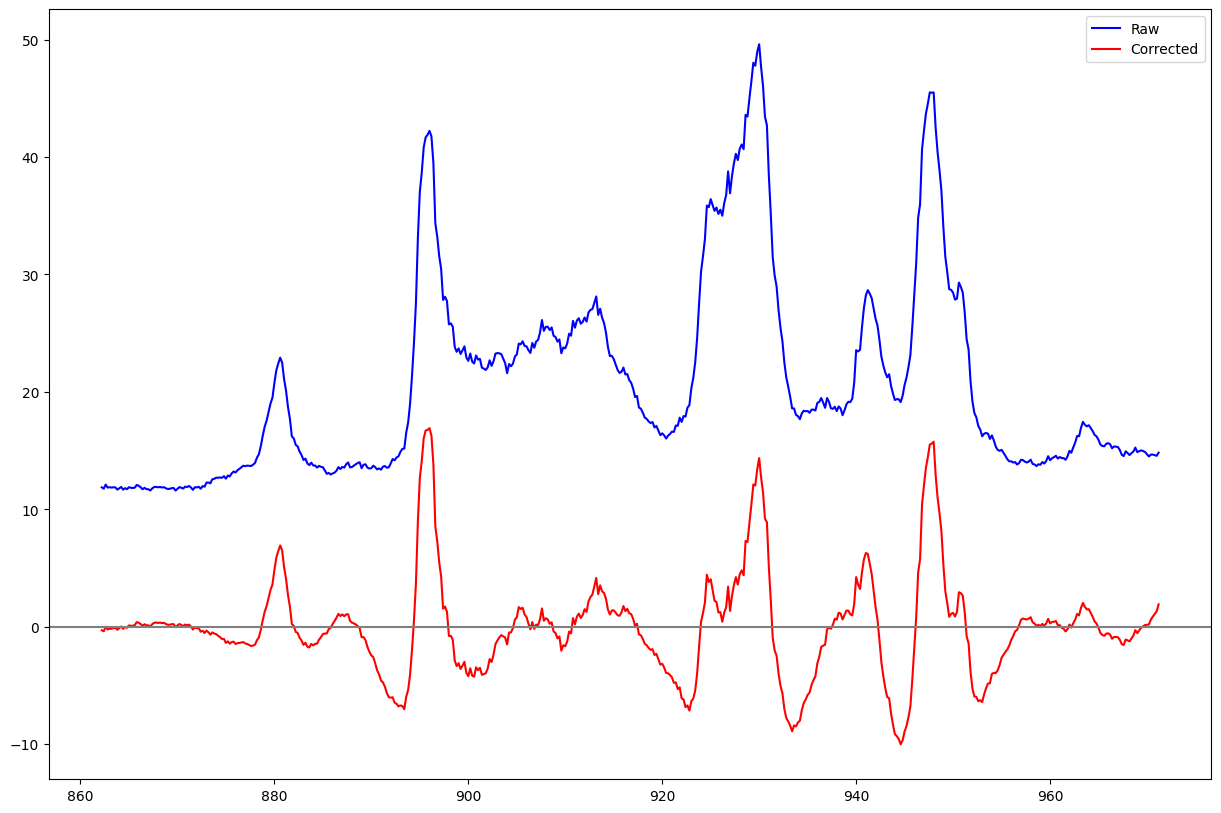

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]

# ROI 데이터
roi_data = df[roi_columns]

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 보정
baseline = savgol_filter(y, window_length=101, polyorder=3)    #필터링 기법을 사용하여 데이터에 대한 부드러운 추세선을 생성

# 보정된 데이터
corrected_data = y - baseline

# 평탄화
window_length = 101  # 평탄화 윈도우 크기 (홀수)
polyorder = 3  # 다항식 차수
smoothed_data = savgol_filter(corrected_data, window_length, polyorder)

# FLAT ON을 적용하여 보정된 그래프 평탄화
flat_data = corrected_data - smoothed_data

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# 보정된 그래프
plt.plot(x, corrected_data, label='Corrected', color='red')

# 평탄화된 그래프
#plt.plot(x, smoothed_data, label='Smoothed', color='green')

# 평탄화된 그래프에 FLAT ON 적용
#plt.plot(x, flat_data, label='Flat ON', color='purple')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


원래 데이터에서 추세 성분을 제거하여 신호의 잡음을 감소시킴


이를 위해 데이터를 윈도우로 나눈 후, 각 윈도우에서 다항식을 접함시킴.


window_length: 필터링에 사용되는 윈도우의 크기입니다. 이 값은 홀수(좌우대치을 위해)로 지정해야 합니다. 작은 값을 선택하면 세부적인 변동에 민감한 추세선이 생성되며, 큰 값을 선택하면 더 부드러운 추세선이 생성됩니다.

polyorder: 윈도우 내에서 사용되는 다항식의 차수입니다. 이 값은 0 이상의 정수로 지정합니다. 일반적으로 2 이상의 값을 선택하여 추세선을 유연하게 만듭니다. 다항식 차수가 높을수록 추세선은 원본 데이터에 더욱 가까워지지만, 과도한 다항식 차수는 잡음까지 추세선으로 포함할 수 있습니다.

작은 window_length 값과 낮은 polyorder 값을 선택하면 추세선이 원본 데이터에 더 가까워지고, 큰 window_length 값과 높은 polyorder 값을 선택하면 추세선이 더 부드럽게 변화


더 세부적인 추세를 제거하기 위해서는 큰 window_length과 높은 polyorder 값을 선택하고, 더 부드러운 추세를 유지하기 위해서는 작은 window_length과 낮은 polyorder 값을 선택

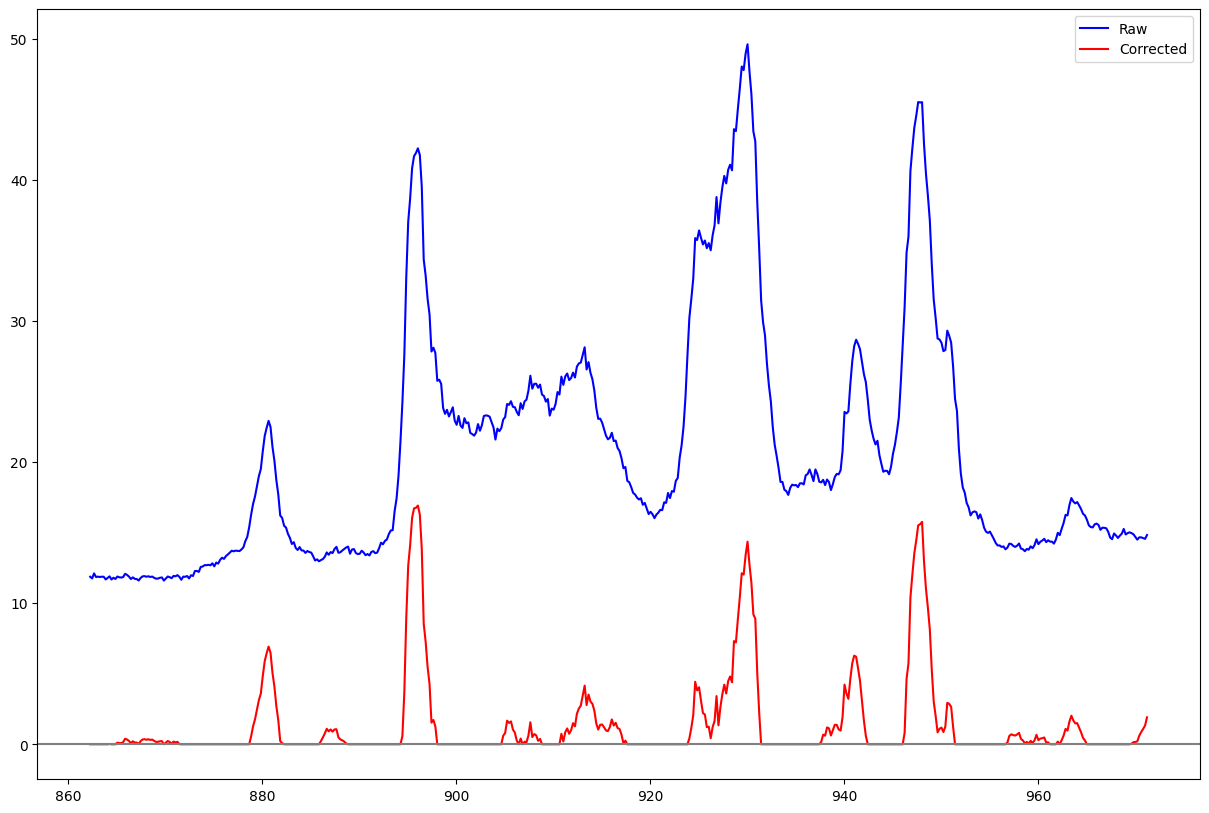

In [ ]:
### 마이너스 값 제외 ###

import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from matplotlib import pyplot as plt

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]

# ROI 데이터
roi_data = df[roi_columns]

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 보정
baseline = savgol_filter(y, window_length=101, polyorder=3)    #필터링 기법을 사용하여 데이터에 대한 부드러운 추세선을 생성

# 보정된 데이터
corrected_data = y - baseline

# 평탄화
window_length = 101  # 평탄화 윈도우 크기 (홀수)
polyorder = 3  # 다항식 차수
smoothed_data = savgol_filter(corrected_data, window_length, polyorder)

# FLAT ON을 적용하여 보정된 그래프 평탄화
flat_data = corrected_data - smoothed_data

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, np.maximum(y, 0), label='Raw', color='blue')

# 보정된 그래프
plt.plot(x, np.maximum(corrected_data, 0), label='Corrected', color='red')

# 평탄화된 그래프
# plt.plot(x, np.maximum(smoothed_data, 0), label='Smoothed', color='green')

# 평탄화된 그래프에 FLAT ON 적용
# plt.plot(x, np.maximum(flat_data, 0), label='Flat ON', color='purple')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()

기준점 개수: 5


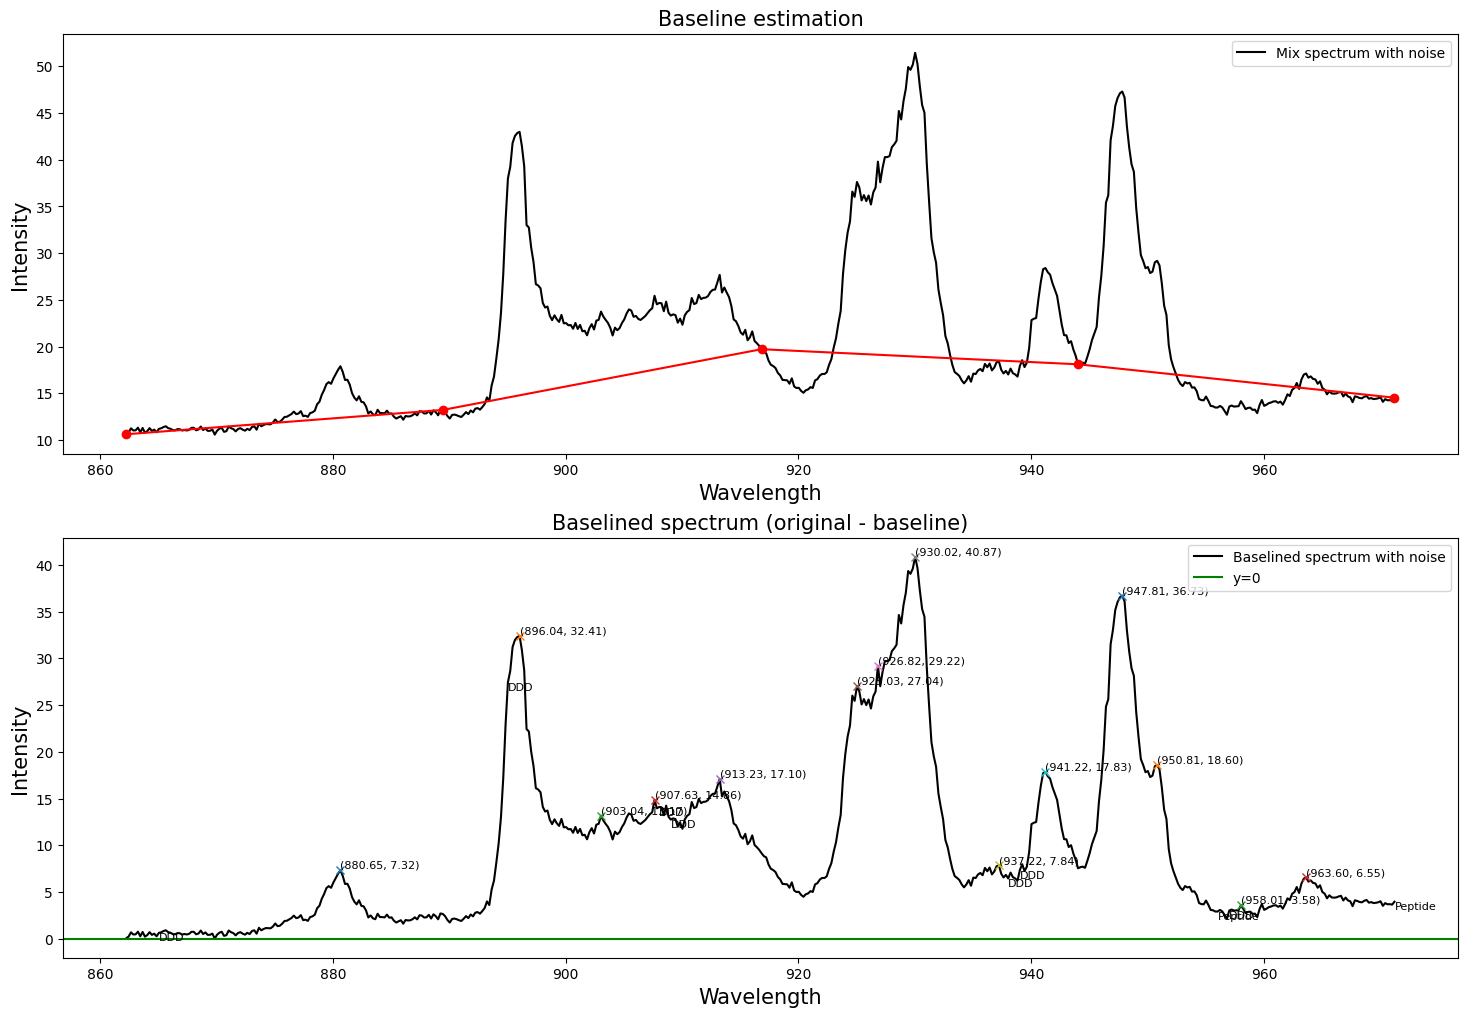

In [ ]:
## 피크 개수 감소
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import find_peaks, peak_prominences

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받아 x축 좌표 잡기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# Baseline estimation 함수
def baseline_als(y, lam, p, niter=100):
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L - 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

# 기존-최소값
baselined_spectrum = y - y.min() # 최소값 뺀 y축 값들

# peak값 찾기
peaks, _ = find_peaks(baselined_spectrum, height=0, width=2)
prominences = peak_prominences(baselined_spectrum, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 100], interpolation='nearest')[2]
peaks, _ = find_peaks(baselined_spectrum, prominence=prominence_new)

# 추가 데이터
additional_data = pd.read_excel('/content/additional_data.xlsx')

# 필요한 성분과 해당하는 주파수 가져오기
assignment = additional_data['Assignment']
frequency = additional_data['Frequency(RAMAN)']
sample = additional_data['Samle']

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 최소값)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기존 - 최소값)
ax2.plot(x, baselined_spectrum, color = 'black', label = 'Baselined spectrum with noise' )
# ax2.plot(x, 0*x, color="green")
ax2.set_title('Baselined spectrum (original - baseline)', fontsize = 15)
ax2.set_xlabel('Wavelength', fontsize = 15)
ax2.set_ylabel('Intensity',  fontsize = 15)
ax2.legend()


# ax2 그래프 (기존 - 최소값) (이어서)
ax2.axhline(y=0,color='green', label='y=0')
ax2.set_title('Baselined spectrum (original - baseline)', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# peak값 그래프 표시
for i in range(len(peaks)):
    x_value = x[peaks[i]]  # 그리고자 하는 x 값
    ax2.plot(x_value, baselined_spectrum[peaks[i]], "x")

# 피크점 수치 출력
for i in range(len(peaks)):
    x_value = x[peaks[i]]  # 피크의 x 값
    y_value = baselined_spectrum[peaks[i]]  # 피크의 y 값
    ax2.text(x_value, y_value, f'({x_value:.2f}, {y_value:.2f})', fontsize=8, verticalalignment='bottom')

# 추가 데이터 표시
for i in range(len(assignment)):
    freq = frequency[i]
    sample_name = sample[i]
    idx = np.abs(x - freq).argmin()
    ax2.text(x[idx], baselined_spectrum[idx], sample_name, fontsize=8, verticalalignment='top')

# 그래프 띄우기
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import find_peaks, peak_prominences

# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].replace('[\$,]', '', regex=True).astype(float)

# y축 값 지정
y = df['ROI 1 []'].replace('[\$,]', '', regex=True).astype(float)

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# Baseline estimation 함수
def baseline_als(y, lam, p, niter=100):
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L - 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    return z

# Baseline subtraction을 적용한 데이터
baseline_subtracted = y - baseline_als(y, lam=10**5, p=0.01)

# peak값 찾기
peaks, _ = find_peaks(baseline_subtracted, height=0, width=2)
prominences = peak_prominences(baseline_subtracted, peaks)[0]
prominence_new = np.percentile(prominences, [0, 25, 50, 75, 100], interpolation='nearest')[2]
peaks, _ = find_peaks(baseline_subtracted, prominence=prominence_new)


# 필요한 성분과 해당하는 주파수 가져오기
assignment = additional_data['Assignment']
frequency = additional_data['Frequency(RAMAN)']
sample = additional_data['Samle']

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프)
ax2.plot(x, baseline_subtracted, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 피크점 수치 출력
for i in range(len(peaks)):
    x_value = x[peaks[i]]  # 피크의 x 값
    y_value = baseline_subtracted[peaks[i]]  # 피크의 y 값
    ax2.text(x_value, y_value, f'({x_value:.2f}, {y_value:.2f})', fontsize=8, verticalalignment='bottom')

# 그래프 띄우기
plt.show()


기준점 개수: 3


<ipython-input-1-2370073914be>:56: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  prominence_new = np.percentile(prominences, [0, 25, 50, 75, 100], interpolation='nearest')[2]


NameError: ignored

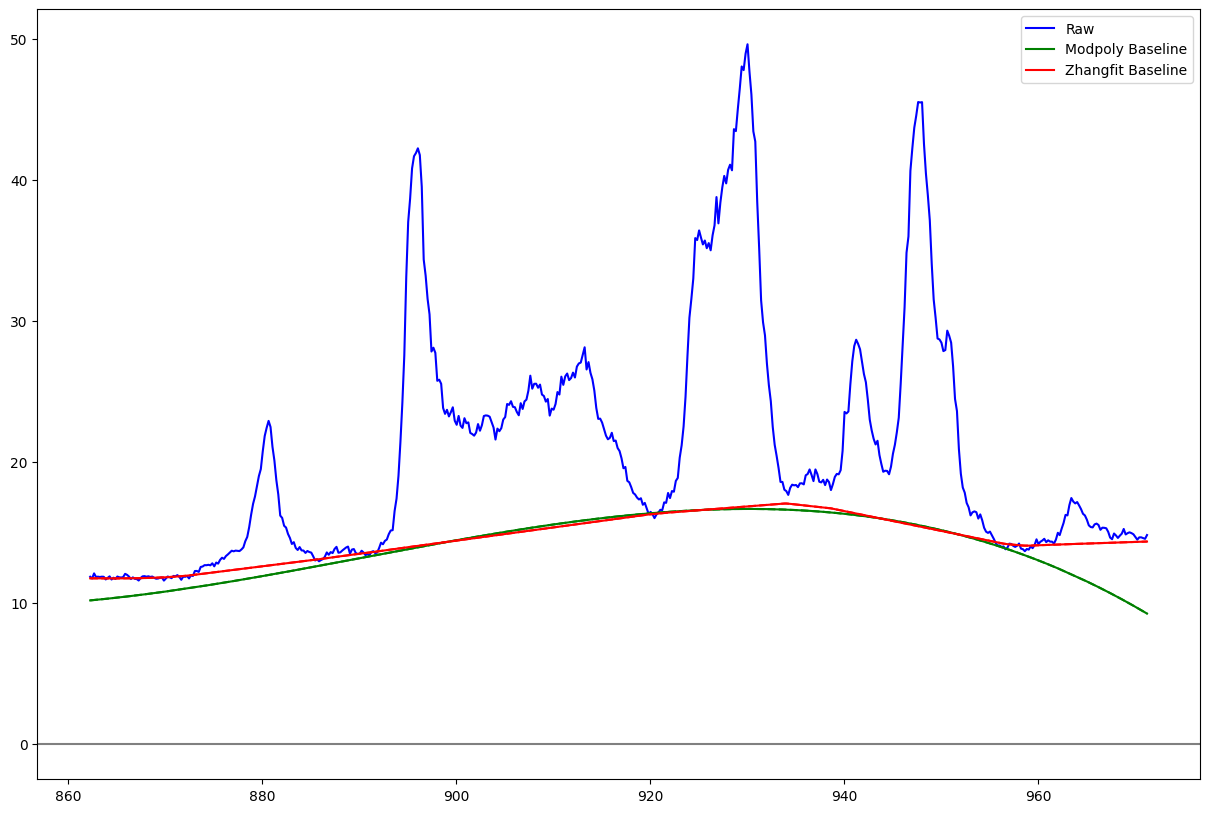

In [ ]:
import numpy as np
import pandas as pd
import rampy
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values
# 다항식 차수
polynomial_degree = 3

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Modpoly_output = baseObj.ModPoly(polynomial_degree)
Imodpoly_output = baseObj.IModPoly(polynomial_degree)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15,10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Modpoly 기준선과 그래프
baseline_modpoly = y - Modpoly_output
plt.plot(x, baseline_modpoly, label='Modpoly Baseline', color='green')
plt.plot(x, baseline_modpoly, '--', color='green')

# IModpoly 기준선과 그래프
#baseline_imodpoly = y - Imodpoly_output
#plt.plot(x, baseline_imodpoly, label='IModpoly Baseline', color='pink')
#plt.plot(x, baseline_imodpoly, '--', color='pink')

# Zhangfit 기준선과 그래프
baseline_zhangfit = y - Zhangfit_output
plt.plot(x, baseline_zhangfit, label='Zhangfit Baseline', color='red')
plt.plot(x, baseline_zhangfit, '--', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


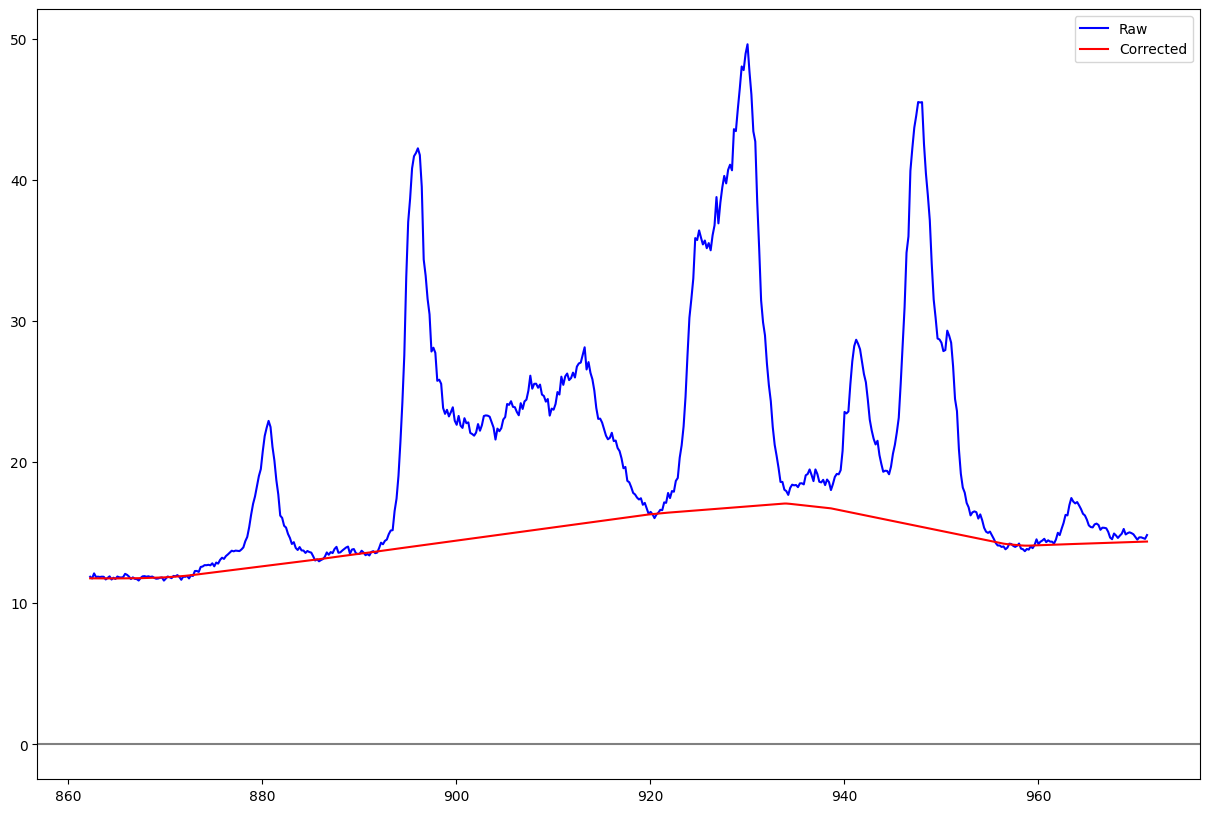

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15,10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Zhangfit 기준선과 보정된 그래프
baseline_zhangfit = Zhangfit_output
corrected_data = y - baseline_zhangfit
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


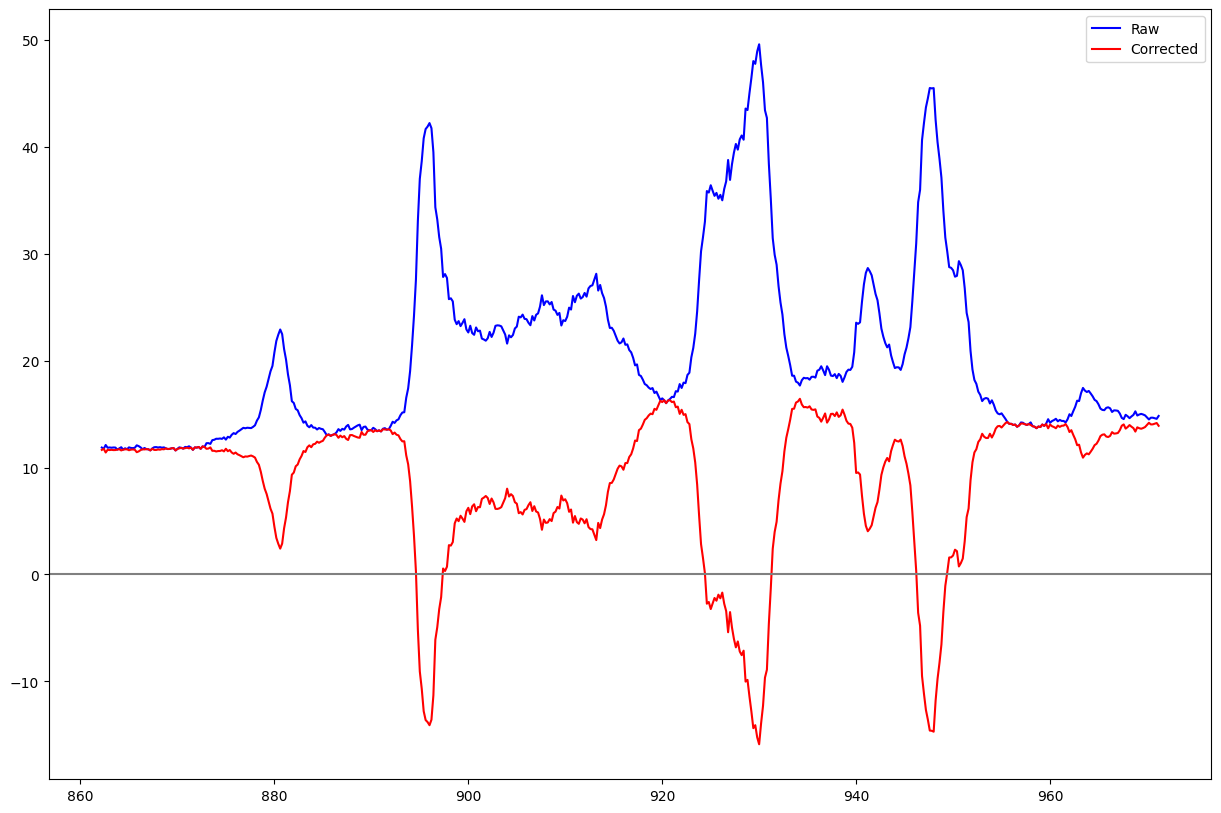

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
Zhangfit_output = baseObj.ZhangFit()

# 그래프 그리기
plt.figure(figsize=(15,10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Zhangfit 기준선과 보정된 그래프
baseline_zhangfit = Zhangfit_output
corrected_data = corrected_data - np.abs(baseline_zhangfit)  # corrected_data에서 0과의 거리를 빼줍니다.
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


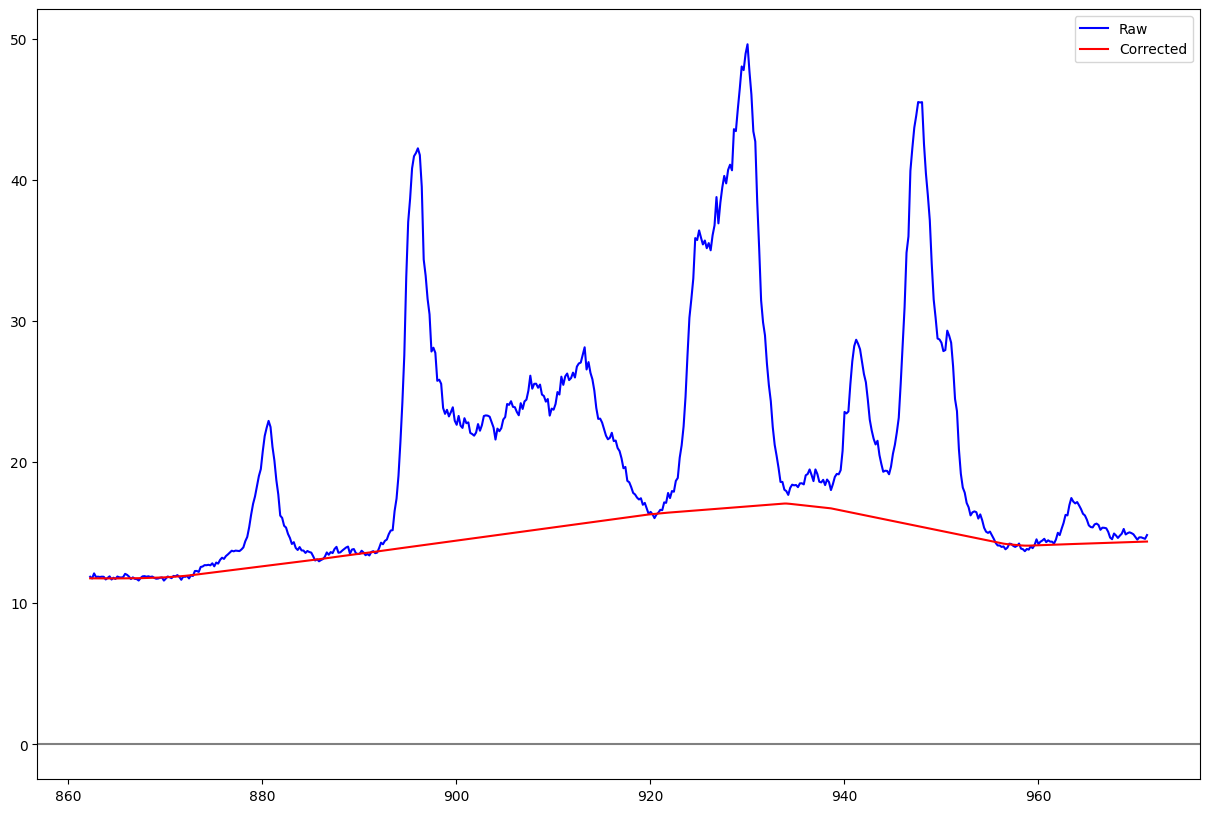

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline 적용된 데이터 계산
corrected_data = y - baseline_output

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


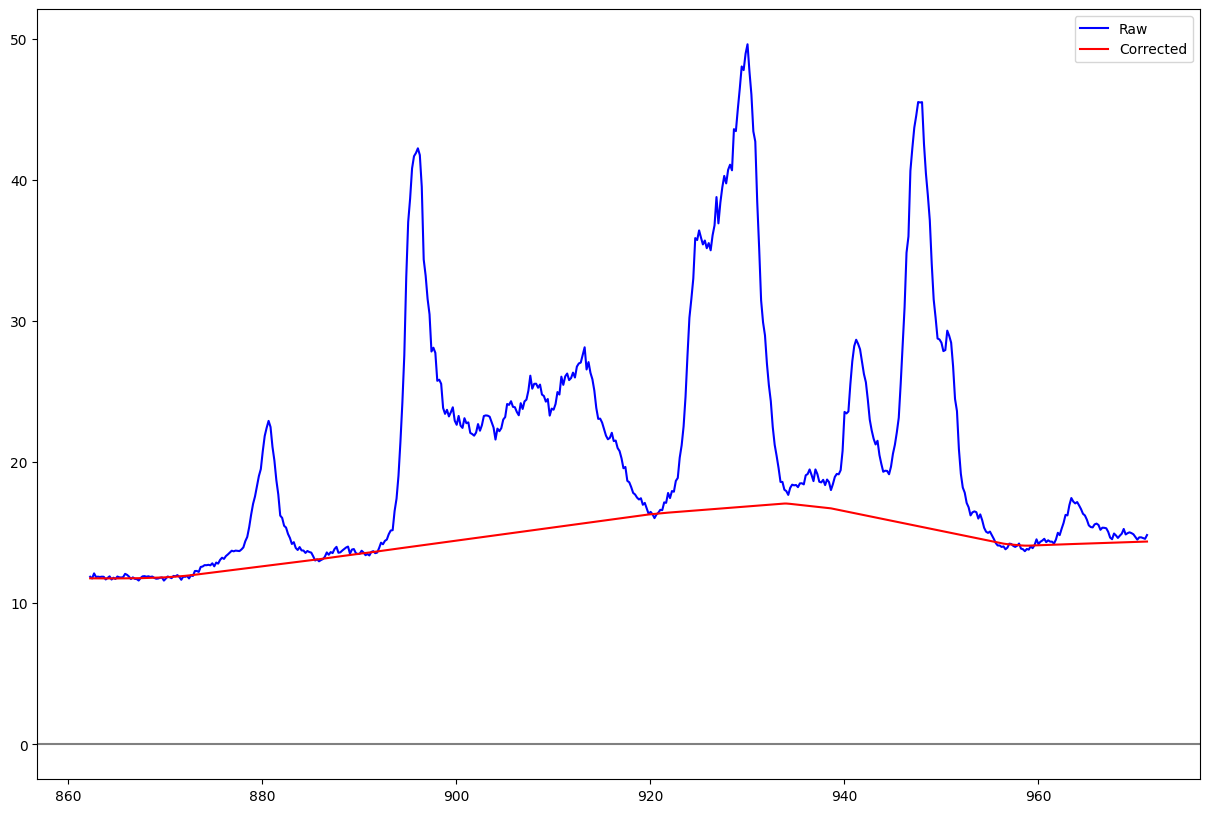

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline 적용된 데이터 계산
corrected_data = y - baseline_output

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


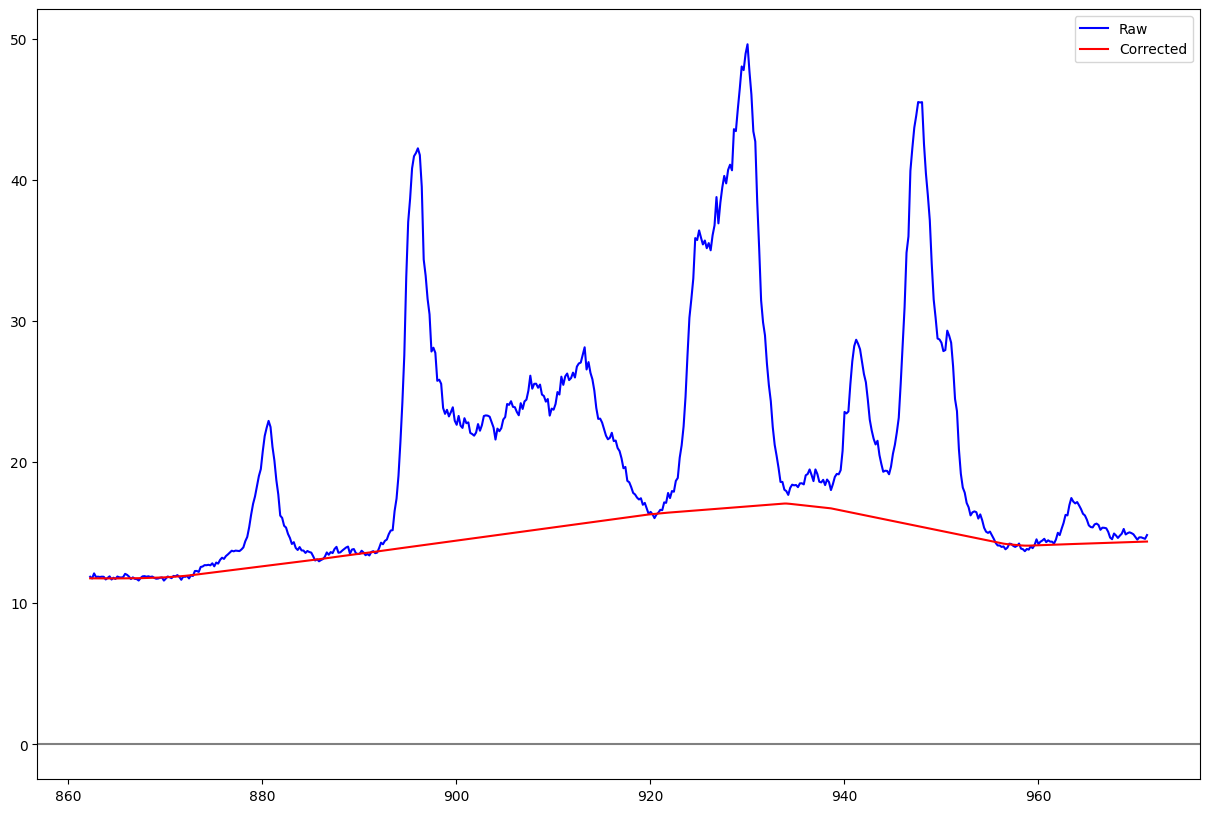

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline 적용된 데이터 계산
corrected_data = y - baseline_output

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, corrected_data, label='Corrected', color='red')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


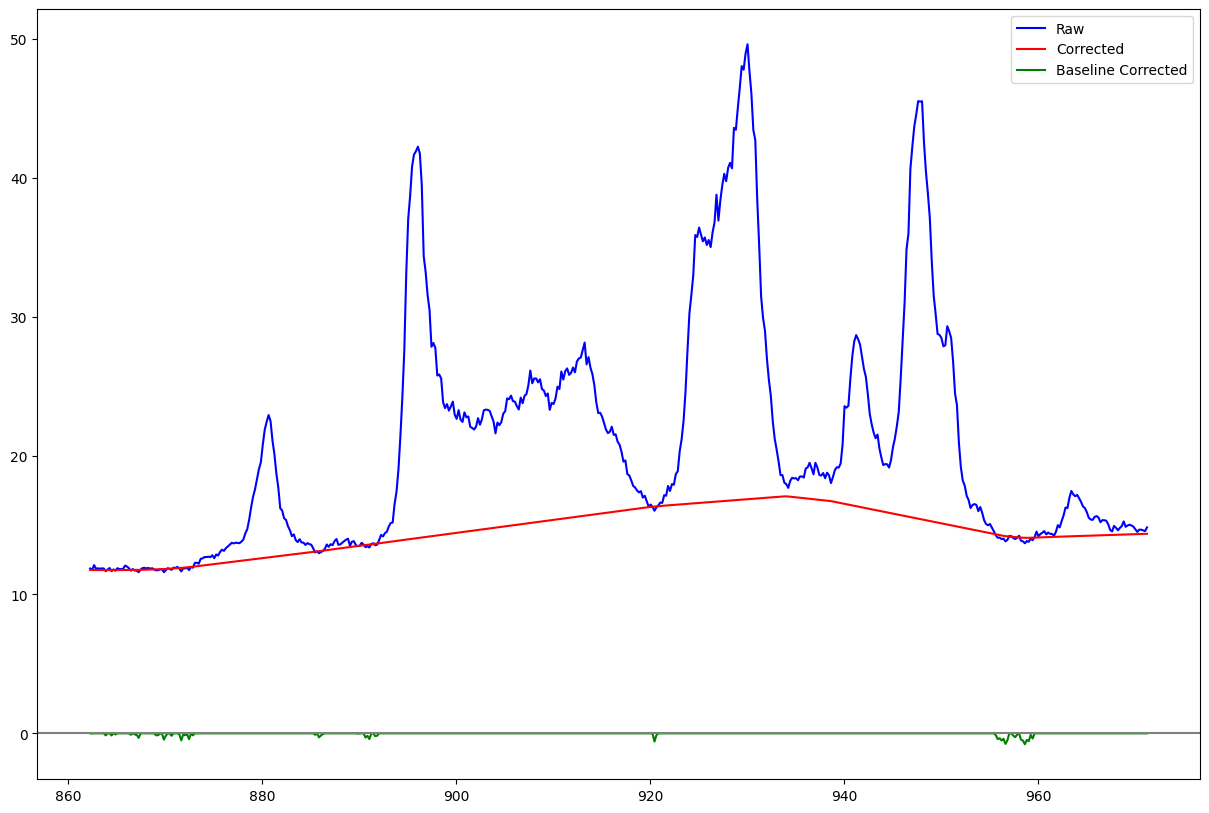

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# 베이스라인 조정
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline 적용된 데이터 계산
corrected_data = y - baseline_output

# Baseline을 0까지 내리면서 그래프 처리
baseline_distance = np.abs(baseline_output)
baseline_corrected = baseline_output - baseline_distance

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, corrected_data, label='Corrected', color='red')

# Baseline을 0까지 내린 그래프
plt.plot(x, baseline_corrected, label='Baseline Corrected', color='green')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


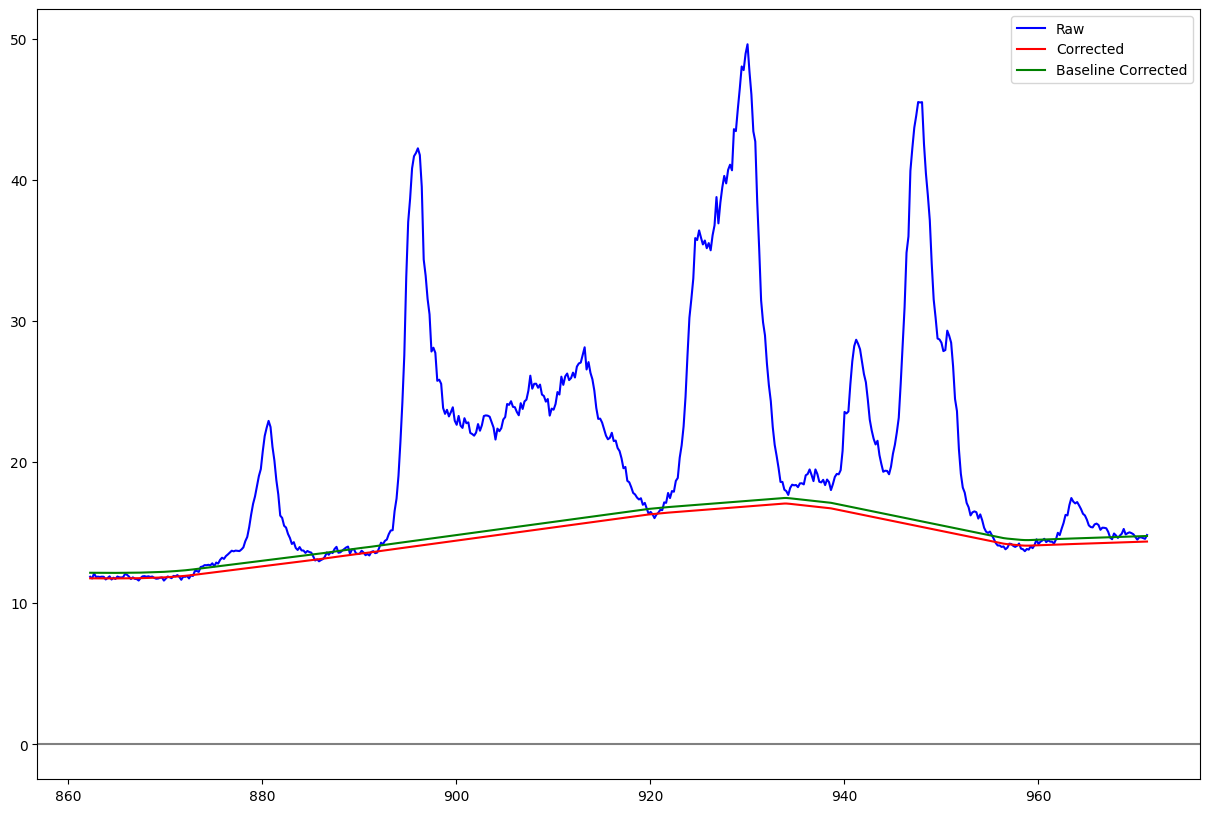

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# Baseline 계산
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline을 0으로 내리고 거리 계산
baseline_min = np.min(baseline_output)
baseline_distance = np.abs(baseline_min)
baseline_corrected = baseline_output - baseline_distance

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, y - baseline_output, label='Corrected', color='red')

# Baseline을 0으로 내린 그래프
plt.plot(x, y - baseline_corrected, label='Baseline Corrected', color='green')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


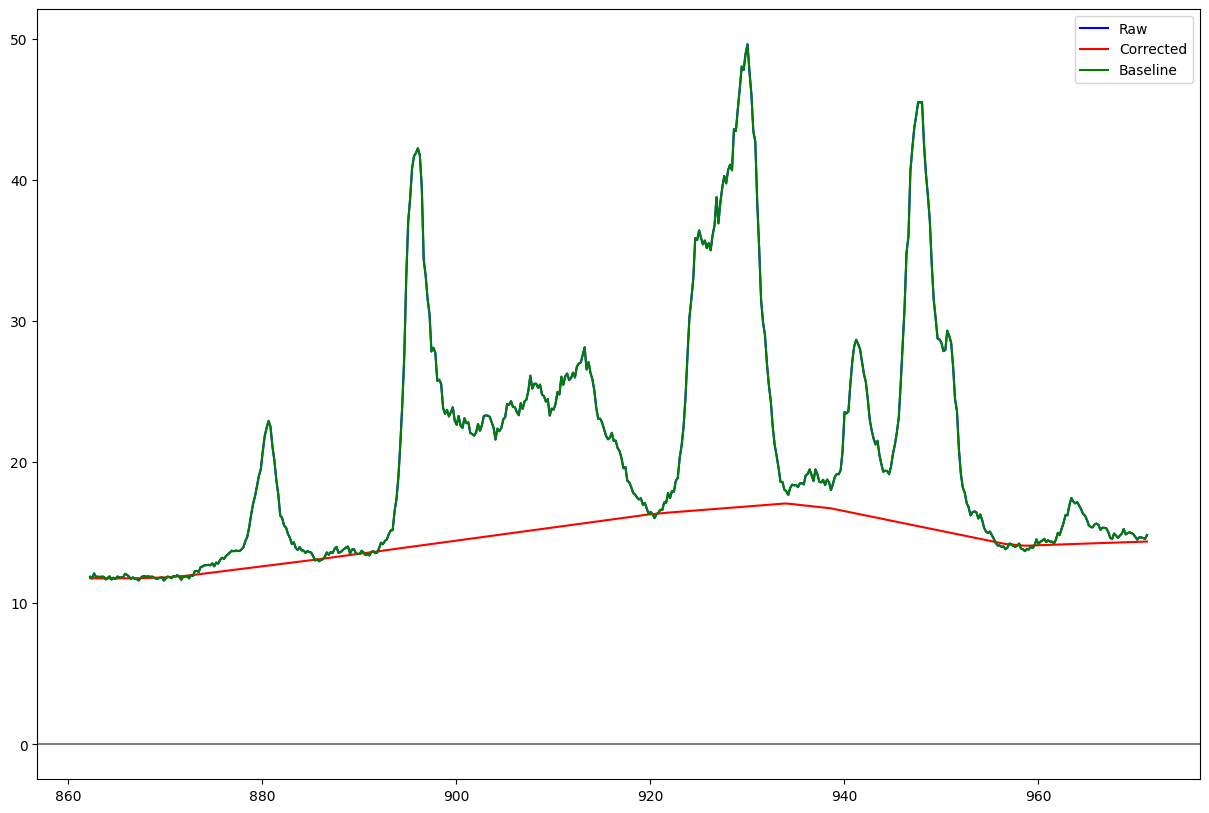

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# Baseline 계산
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline 선언
baseline = baseline_output  # Baseline을 선언합니다.

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
corrected_data = y - baseline_output
plt.plot(x, corrected_data, label='Corrected', color='red')

# Baseline을 그래프에 적용
baseline_applied = corrected_data + baseline
plt.plot(x, baseline_applied, label='Baseline', color='green')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


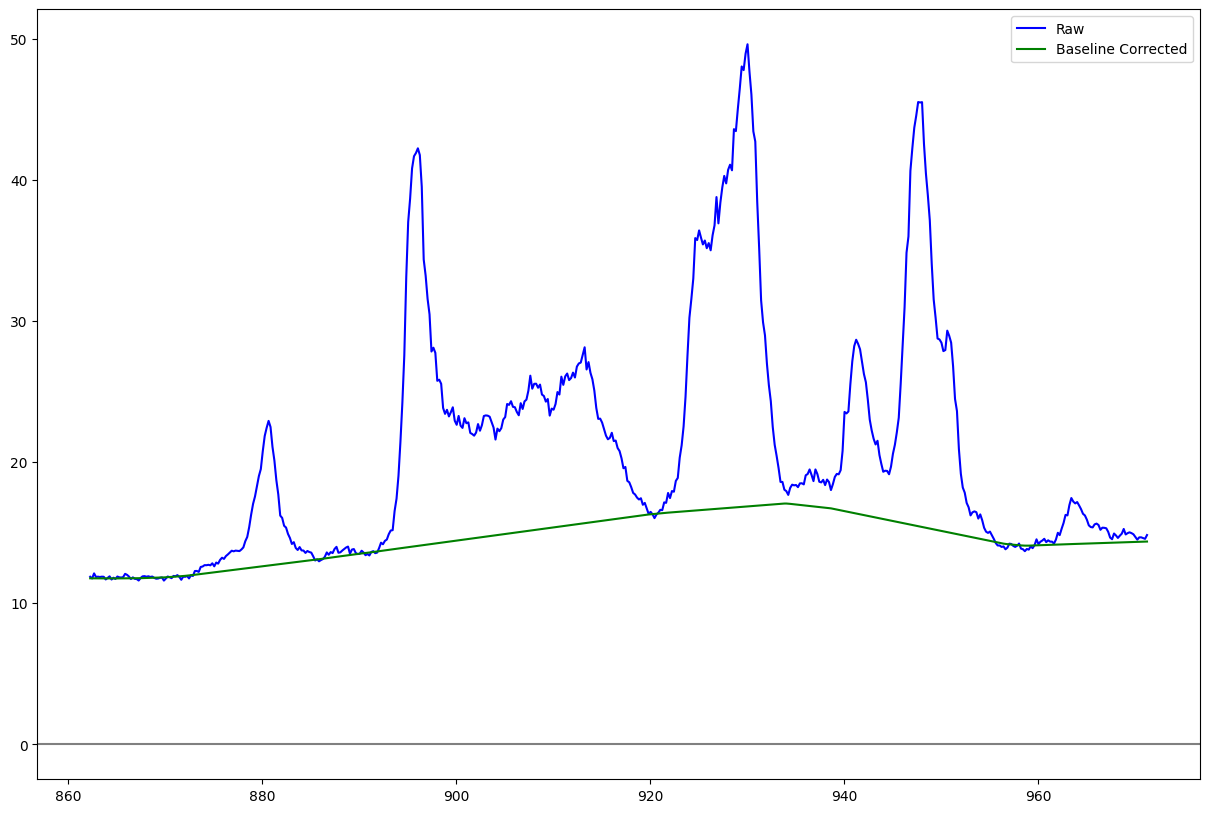

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# Baseline 계산
baseObj = BaselineRemoval(y)
baseline_output = baseObj.ZhangFit()  # BaselineRemoval 클래스의 적절한 메서드를 사용하여 Baseline을 추정합니다.

# Baseline 선언
baseline = baseline_output  # Baseline을 선언합니다.

# Baseline을 적용한 데이터 계산
baseline_applied = y - baseline

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, baseline_applied, label='Baseline Corrected', color='green')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()


Maximum number of iterations exceeded


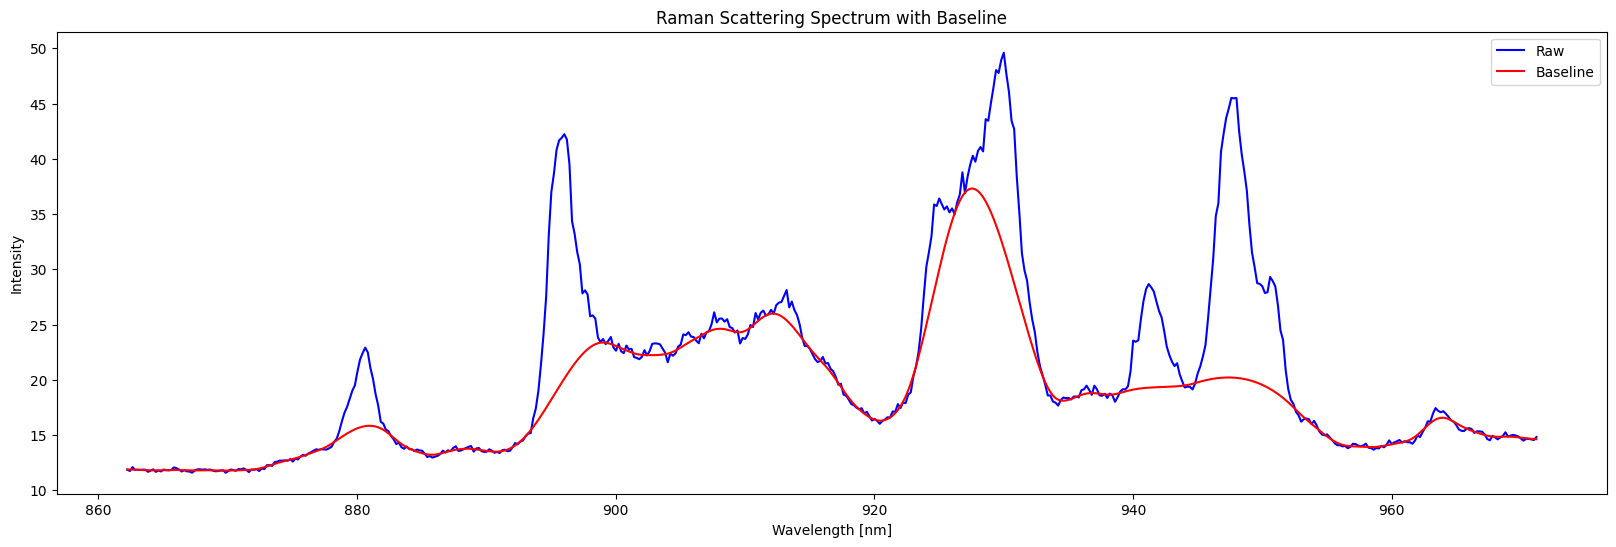

Peak value: 49.60538461538462


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
from scipy.sparse import linalg
from numpy.linalg import norm

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# df라는 이름의 dataframe
decimal_columns = df.columns[0:]  # 소수점 값이 있는 첫번째 열부터 시작

# 소수점 값을 소수점 둘째자리까지 반올림
df[decimal_columns] = df[decimal_columns].round(2)

# apply 메소드를 사용해 사용자 정의 반올림 함수 지정 가능
df[decimal_columns] = df[decimal_columns].apply(lambda x: round(x, 2))

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# 스펙트럼 계산
wavelengths = df['Axis [nm]'].values
intensities = roi_data.mean(axis=1).values

# Baseline 계산
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

baseline = baseline_arPLS(intensities)

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(wavelengths, intensities, label='Raw', color='blue')
plt.plot(wavelengths, baseline, label='Baseline', color='red')

# 그래프 제목 설정
plt.title('Raman Scattering Spectrum with Baseline')

# x축, y축 레이블 설정
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity')

plt.legend()

# 그래프 표시
plt.show()

# 그래프 피크 값 출력
peaks = pd.Series(intensities, index=wavelengths).max()
print("Peak value:", peaks)


Maximum number of iterations exceeded


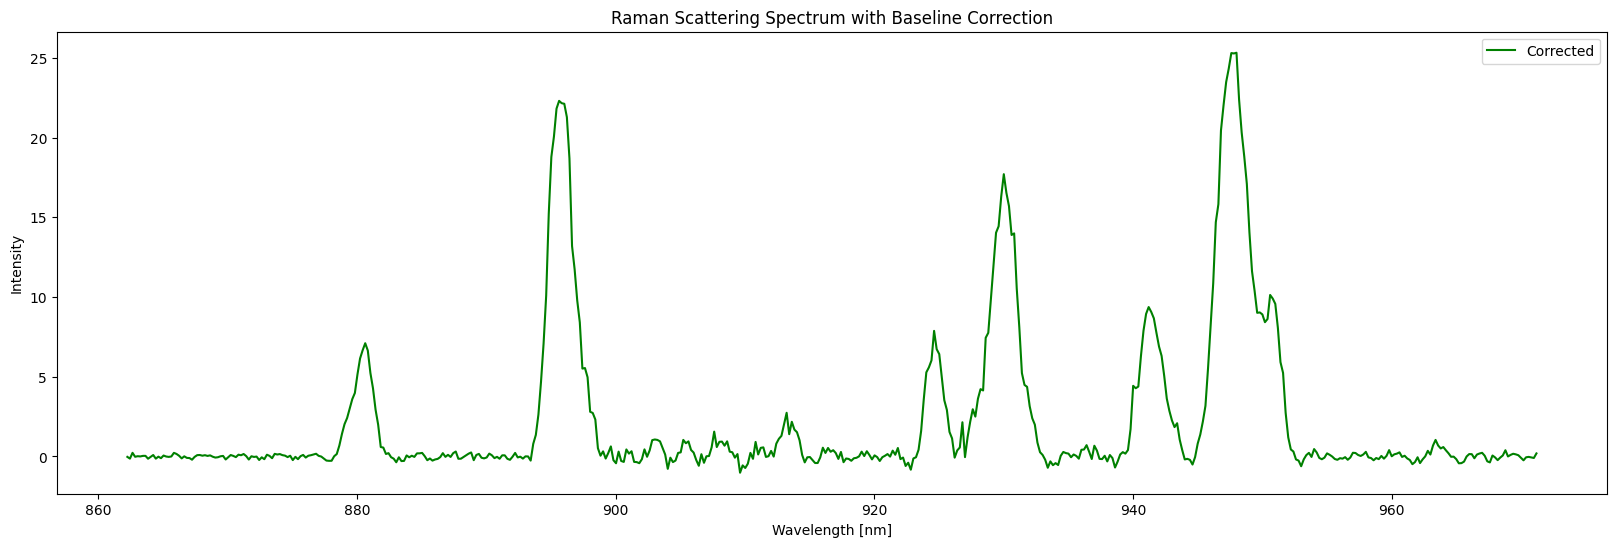

Peak value: 25.322667433667135


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse
from scipy.sparse import linalg
from numpy.linalg import norm

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# df라는 이름의 dataframe
decimal_columns = df.columns[0:]  # 소수점 값이 있는 첫번째 열부터 시작

# 소수점 값을 소수점 둘째자리까지 반올림
df[decimal_columns] = df[decimal_columns].round(2)

# apply 메소드를 사용해 사용자 정의 반올림 함수 지정 가능
df[decimal_columns] = df[decimal_columns].apply(lambda x: round(x, 2))

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# 스펙트럼 계산
wavelengths = df['Axis [nm]'].values    # Raman 스펙트럼의 각 데이터 포인트에 해당하는 파장 값
intensities = roi_data.mean(axis=1).values    # Raman 스펙트럼의 각 데이터 포인트에 해당하는 강도 값 (ROI 데이터의 평균을 계산)


# Baseline 계산
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

baseline = baseline_arPLS(intensities)

# Baseline 적용
intensities_corrected = intensities - baseline

# 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(wavelengths, intensities_corrected, label='Corrected', color='green')

# 그래프 제목 설정
plt.title('Raman Scattering Spectrum with Baseline Correction')

# x축, y축 레이블 설정
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity')

plt.legend()

# 그래프 표시
plt.show()

# 그래프 피크 값 출력
peaks = pd.Series(intensities_corrected, index=wavelengths).max()
print("Peak value:", peaks)

Maximum number of iterations exceeded


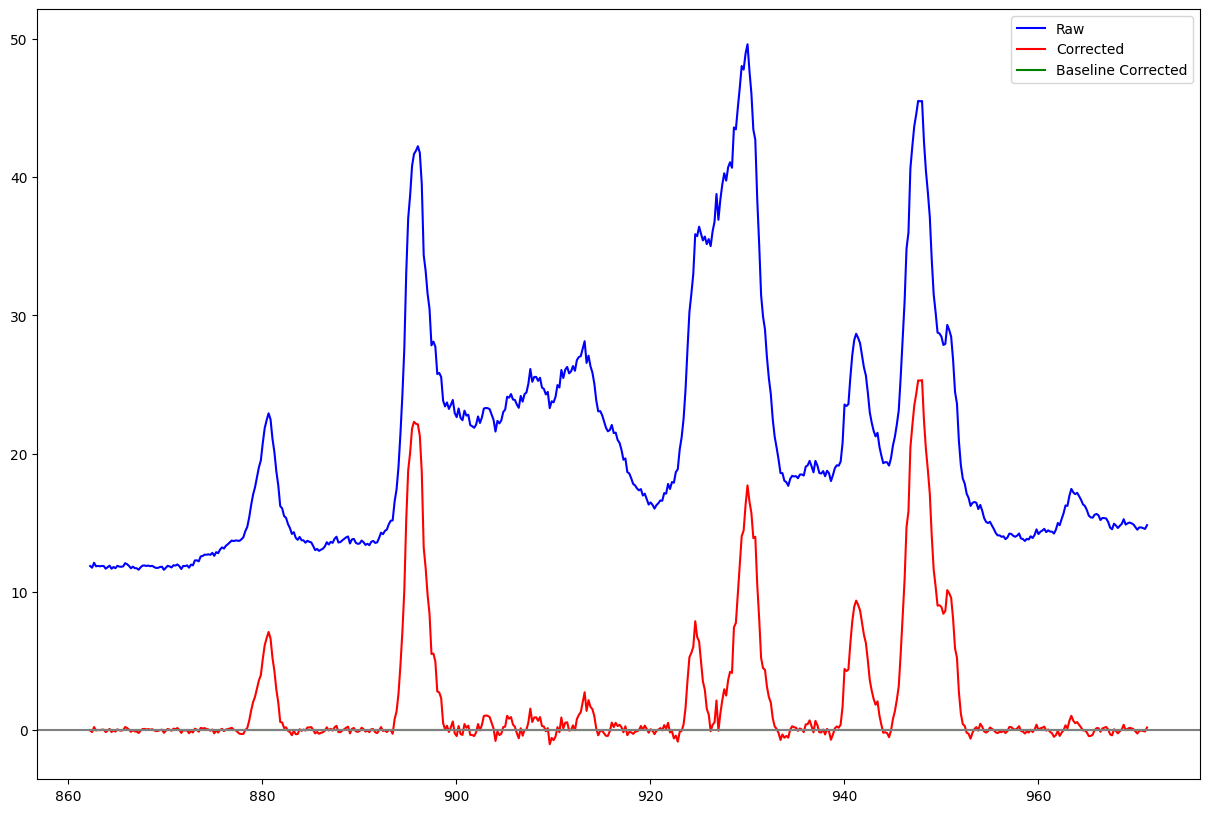

기준점 개수: 5
Maximum number of iterations exceeded


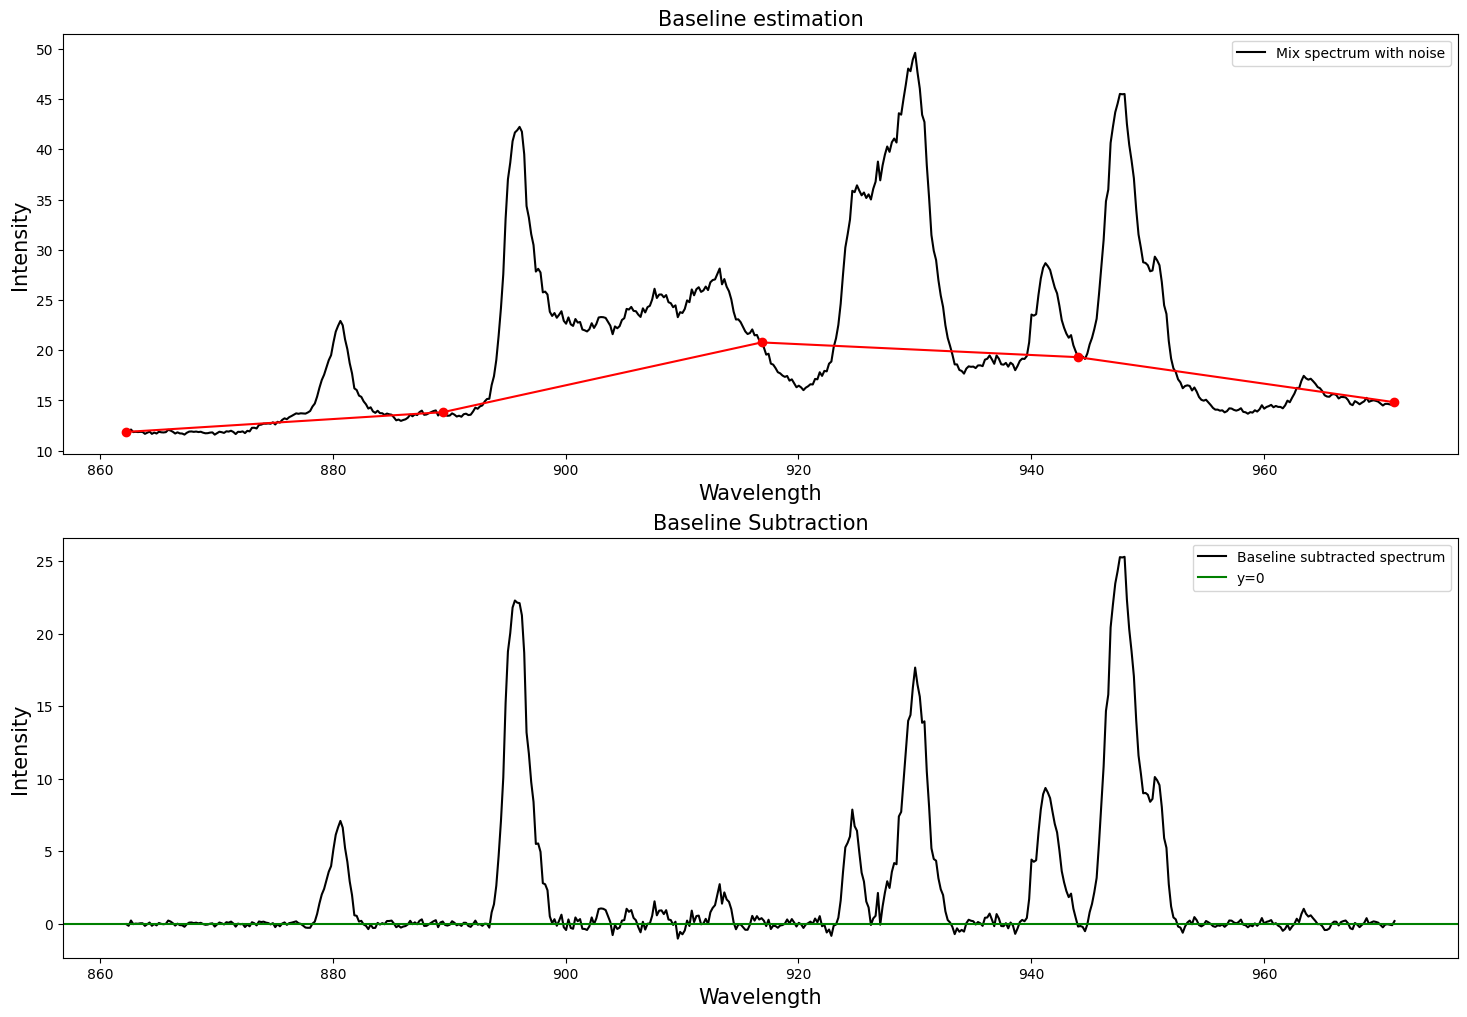

In [ ]:
# 파일 불러오기
file = '/content/UR2 BXPC3 raman raw data__24h.csv'
df = pd.read_csv(file)
# x축 값 지정
x = df['Axis [nm]'].values

# Y축 데이터
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]
y = roi_data.mean(axis=1).values

# 기준점 개수 n 입력받기
n = int(input("기준점 개수: "))

# 기준점 예외처리
if n < 2:
    print("기준점은 2개 이상 필요합니다.")
    exit()

# 기준점 인덱스
nlist = []
for i in range(0, n - 1):
    nlist.append(int(len(x) / (n - 1) * i))
nlist.append(len(x) - 1)

# 기준점 x, y좌표
c = []
d = []
for i in nlist:
    c.append(x[i])
    d.append(y[i])

# Baseline estimation 함수
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

# Baseline estimation
baseline = baseline_arPLS(y, ratio=1e-6, lam=100, niter=10)

# Baseline subtraction을 적용한 데이터
corrected_data = y - baseline

# 그래프 형식 지정
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12))

# ax1 그래프 (기존, 기준점)
ax1.plot(x, y, color='black', label='Mix spectrum with noise')
ax1.plot(c, d, 'ro-')
ax1.set_title('Baseline estimation', fontsize=15)
ax1.set_xlabel('Wavelength', fontsize=15)
ax1.set_ylabel('Intensity', fontsize=15)
ax1.legend()

# ax2 그래프 (기준점 삭제된 그래프)
ax2.plot(x, corrected_data, color='black', label='Baseline subtracted spectrum')
ax2.axhline(y=0, color='green', label='y=0')
ax2.set_title('Baseline Subtraction', fontsize=15)
ax2.set_xlabel('Wavelength', fontsize=15)
ax2.set_ylabel('Intensity', fontsize=15)
ax2.legend()

# 그래프 띄우기
plt.show()


Maximum number of iterations exceeded


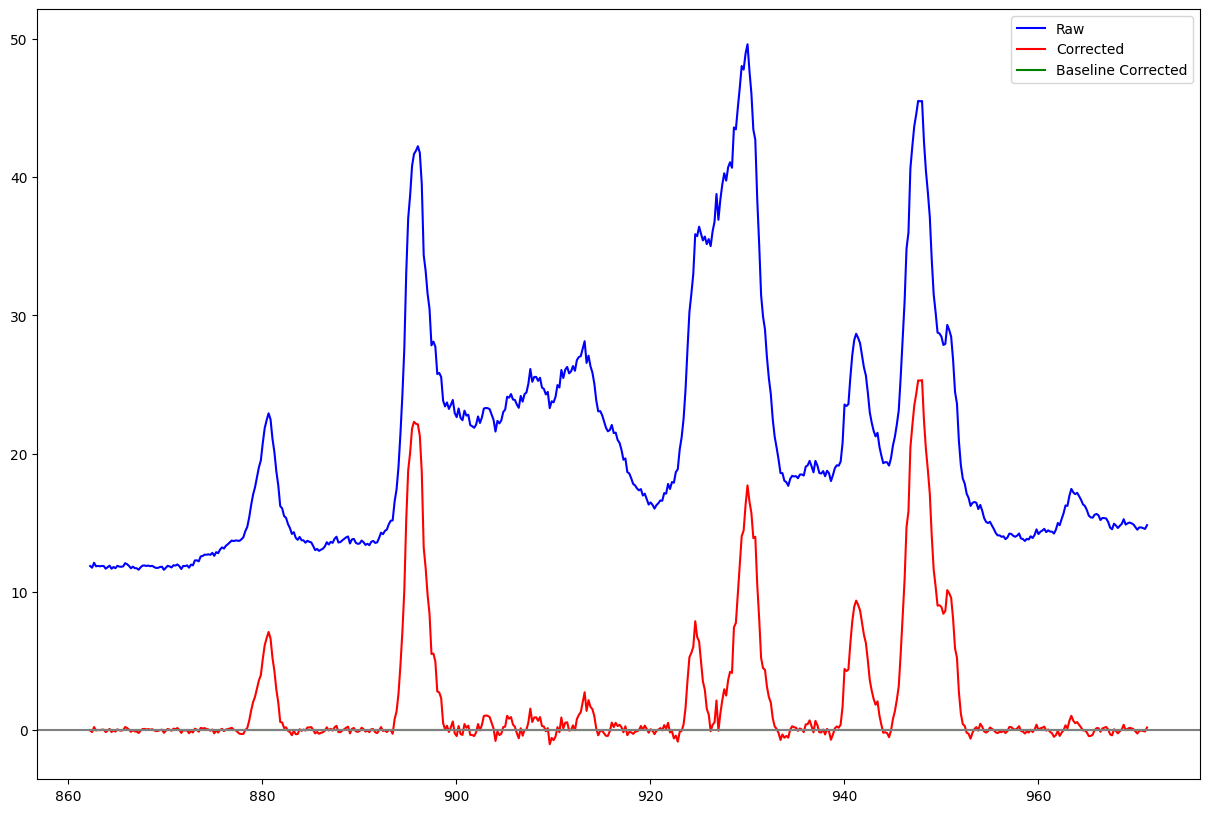

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from BaselineRemoval import BaselineRemoval

# 데이터 로드
df = pd.read_csv('/content/UR2 BXPC3 raman raw data__24h.csv')

# 소수점 둘째 자리까지 반올림
df = df.round(2)

# 관심 영역 선택 (ROI)
roi_columns = df.columns[df.columns.str.startswith('ROI')]
roi_data = df[roi_columns]

# X축 데이터
x = df['Axis [nm]'].values

# Y축 데이터
y = roi_data.mean(axis=1).values

# Baseline 계산
def baseline_arPLS(y, ratio=1e-6, lam=100, niter=10):
    L = len(y)
    diag = np.ones(L - 2)
    D = sparse.spdiags([diag, -2 * diag, diag], [0, -1, -2], L, L - 2)
    H = lam * D.dot(D.T)
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    crit = 1
    count = 0
    while crit > ratio:
        z = linalg.spsolve(W + H, W * y)
        d = y - z
        dn = d[d < 0]
        m = np.mean(dn)
        s = np.std(dn)
        w_new = 1 / (1 + np.exp(2 * (d - (2 * s - m)) / s))
        crit = norm(w_new - w) / norm(w)
        w = w_new
        W.setdiag(w)
        count += 1
        if count > niter:
            print('Maximum number of iterations exceeded')
            break
    return z

baseline_output = baseline_arPLS(y)

# Baseline 적용된 데이터 계산
corrected_data = y - baseline_output

# Baseline을 0까지 내리면서 그래프 처리
baseline_distance = np.abs(baseline_output)
baseline_corrected = baseline_output - baseline_distance

# 그래프 그리기
plt.figure(figsize=(15, 10))

# raw 그래프
plt.plot(x, y, label='Raw', color='blue')

# Baseline이 적용된 그래프
plt.plot(x, corrected_data, label='Corrected', color='red')

# Baseline을 0까지 내린 그래프
plt.plot(x, baseline_corrected, label='Baseline Corrected', color='green')

plt.axhline(y=0, color='gray')

plt.legend()
plt.show()